In [3]:
import numpy as np
import cv2

In [12]:
from matplotlib import pyplot as plt

In [6]:
from cancer.variables import CANCER_DATA_DIR, NORMAL_CELL_TYPES_SIP, ABNORMAL_CELL_TYPES_SIP, NO
from cancer.datasets import get_sipakmed

In [5]:
dataset = get_sipakmed()

In [33]:
cell_category = NORMAL_CELL_TYPES_SIP[0]
img_paths = dataset[cell_category]['imgs']

img = cv2.imread(img_path)
img2 = cv2.imread(img_path2)

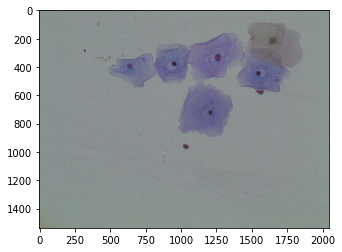

In [34]:
plt.imshow(img)

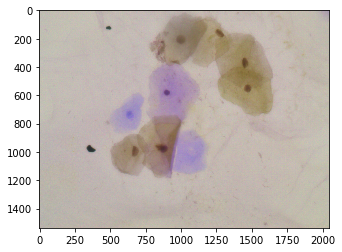

In [35]:
plt.imshow(img2)

## Color Hist

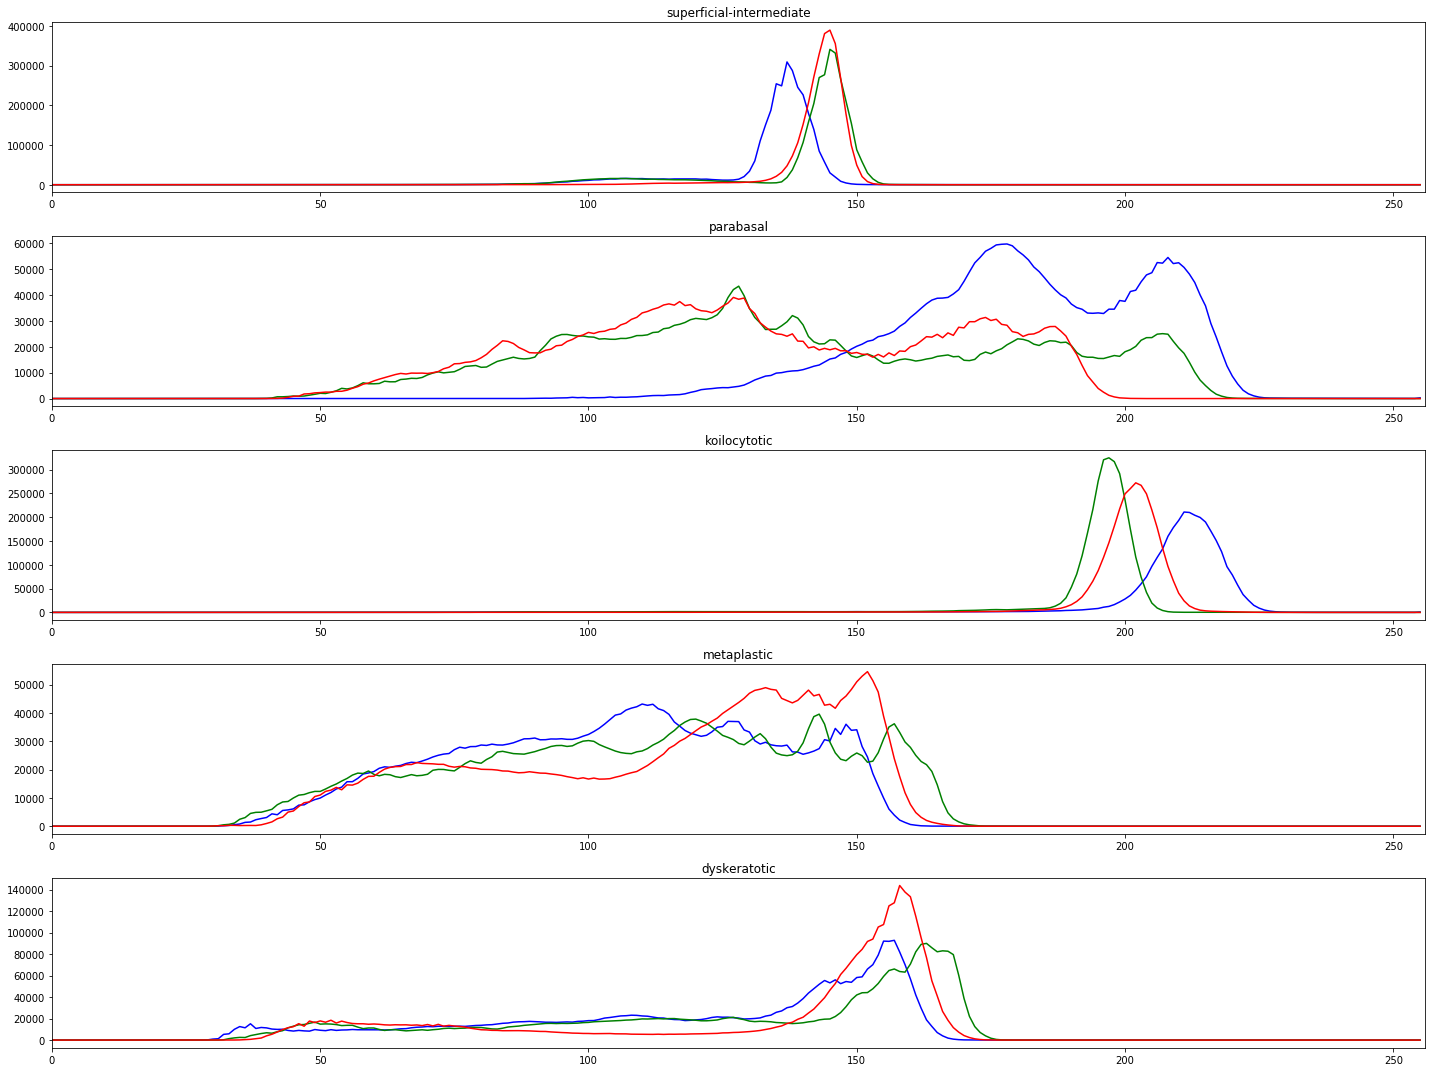

In [43]:
plt.figure(figsize=(20,15))
cell_keys = NORMAL_CELL_TYPES_SIP + ABNORMAL_CELL_TYPES_SIP
for it, cell_category in enumerate(cell_keys):
    plt.subplot(len(cell_keys),1,it+1)
    plt.title(cell_category)
    img_paths = dataset[cell_category]['imgs']

    image_list = []
    for path in img_paths:
        img = cv2.imread(path)
        image_list.append(img)

    for i, c in enumerate(('b', 'g', 'r')):
        hist = cv2.calcHist(image_list, [i], None, [256], [0, 256])
        plt.plot(hist, color=c)

    plt.xlim([0, 256])

plt.tight_layout()
plt.savefig('test.png')
plt.show()

In [44]:
NORMAL_CELL_TYPES_SIP

['superficial-intermediate', 'parabasal']

## Polys

In [47]:
from shapely import geometry


In [50]:
poly = geometry.Polygon(dataset[cell_category]['cytos'][0][0])
poly.area

5667.25

In [58]:
cell_keys = NORMAL_CELL_TYPES_SIP + ABNORMAL_CELL_TYPES_SIP
for it, cell_category in enumerate(cell_keys):
    avg_area = 0
    cell_list = dataset[cell_category]['cytos']
    for cell in cell_list:
        for p in cell:
            poly = geometry.Polygon(p)
            avg_area += poly.area
    print(f'{cell_category:27}: {avg_area:.3f}')

superficial-intermediate   : 60556499.240
parabasal                  : 16237347.202
koilocytotic               : 13207607.362
metaplastic                : 17930592.021
dyskeratotic               : 4877934.463
